In [3]:
import tensorflow as tf
from tensorflow import keras
import random
import numpy as np
import matplotlib.pyplot as plt

In [4]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [5]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


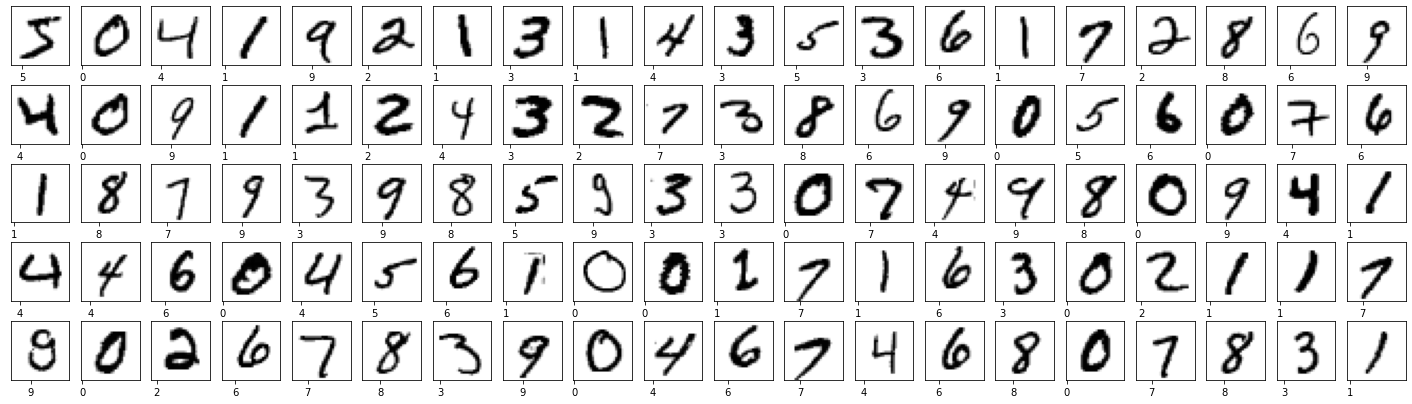

In [6]:
plt.figure(figsize=(25,7))

for i in range(100):
  plt.subplot(5,20,i+1)
  plt.imshow(x_train[i], cmap='gray_r');
  plt.xticks([y_train[i]])
  plt.yticks([]);

plt.show();

In [7]:
x_train = x_train.reshape(60000, 28, 28, 1)
x_test = x_test.reshape(10000, 28, 28, 1)
x_train, x_test = x_train.astype("float32") / 255,  x_test.astype("float32") / 255

In [8]:
model_1 = keras.Sequential([
   keras.Input(shape=(28,28,1)),
    keras.layers.Conv2D(filters=32, kernel_size=(5,5), activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(3,3)),
    keras.layers.Conv2D(filters=16, kernel_size=(3,3), activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(5,5)),
    keras.layers.Flatten(),
    keras.layers.Dense(units=128, activation='relu'),
    keras.layers.Dense(units=64, activation='relu'),
    keras.layers.Dense(units=10, activation='softmax'),
]
)
model_1.summary();

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 6, 6, 16)          4624      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 1, 1, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 128)               2176      
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8

In [9]:
model_1.compile(
    optimizer='adam', 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
    )

In [10]:
h1=model_1.fit(x=x_train, y=y_train, epochs=5, validation_split=0.16, batch_size=60 )

Epoch 1/5
840/840 [==============================] - 34s 5ms/step - loss: 0.5281 - accuracy: 0.8338 - val_loss: 0.2261 - val_accuracy: 0.9303
Epoch 2/5
840/840 [==============================] - 4s 5ms/step - loss: 0.1888 - accuracy: 0.9415 - val_loss: 0.1426 - val_accuracy: 0.9566
Epoch 3/5
840/840 [==============================] - 4s 5ms/step - loss: 0.1449 - accuracy: 0.9547 - val_loss: 0.1814 - val_accuracy: 0.9456
Epoch 4/5
840/840 [==============================] - 4s 5ms/step - loss: 0.1223 - accuracy: 0.9624 - val_loss: 0.1062 - val_accuracy: 0.9694
Epoch 5/5
840/840 [==============================] - 4s 5ms/step - loss: 0.1080 - accuracy: 0.9673 - val_loss: 0.0989 - val_accuracy: 0.9704


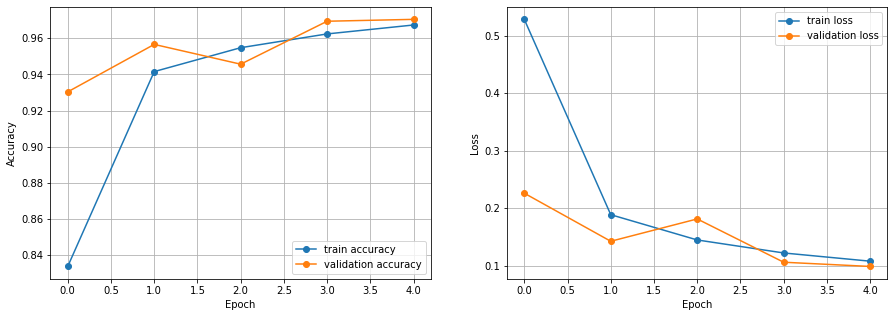

In [11]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(h1.history['accuracy'], 'o-', label='train accuracy')
plt.plot(h1.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')
plt.subplot(1,2,2)
plt.plot(h1.history['loss'], 'o-', label='train loss')
plt.plot(h1.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')
plt.show()

In [12]:
test_loss_1, test_accuracy_1 = model_1.evaluate(x_test,y_test)
print(test_loss_1*100, test_accuracy_1*100)

313/313 [==============================] - 1s 4ms/step - loss: 0.0969 - accuracy: 0.9711
9.69158560037613 97.10999727249146


In [13]:
model_2 = keras.Sequential([
    keras.Input(shape=(28,28,1)),
    keras.layers.Conv2D(filters=32, kernel_size=(5,5), activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(3,3)),
    keras.layers.Conv2D(filters=16, kernel_size=(3,3), activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(5,5)),
    keras.layers.Flatten(),
    keras.layers.Dense(units=128, activation='relu'),
    keras.layers.Dense(units=64, activation='relu'),
    keras.layers.Dense(units=10, activation='softmax'),
]
)
model_2.summary();

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 6, 6, 16)          4624      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 1, 1, 16)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 16)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               2176      
_________________________________________________________________
dense_4 (Dense)              (None, 64)               

In [14]:
model_2.compile(
    optimizer=keras.optimizers.SGD(), 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
    )

In [15]:
h2=model_2.fit(x=x_train, y=y_train, epochs=5, validation_split=0.16, batch_size=60 )

Epoch 1/5
840/840 [==============================] - 5s 5ms/step - loss: 2.2239 - accuracy: 0.3055 - val_loss: 1.9865 - val_accuracy: 0.4859
Epoch 2/5
840/840 [==============================] - 4s 5ms/step - loss: 1.1405 - accuracy: 0.6788 - val_loss: 0.5392 - val_accuracy: 0.8443
Epoch 3/5
840/840 [==============================] - 4s 5ms/step - loss: 0.4655 - accuracy: 0.8584 - val_loss: 0.3610 - val_accuracy: 0.8947
Epoch 4/5
840/840 [==============================] - 4s 5ms/step - loss: 0.3317 - accuracy: 0.8968 - val_loss: 0.2635 - val_accuracy: 0.9198
Epoch 5/5
840/840 [==============================] - 4s 5ms/step - loss: 0.2718 - accuracy: 0.9173 - val_loss: 0.2303 - val_accuracy: 0.9305


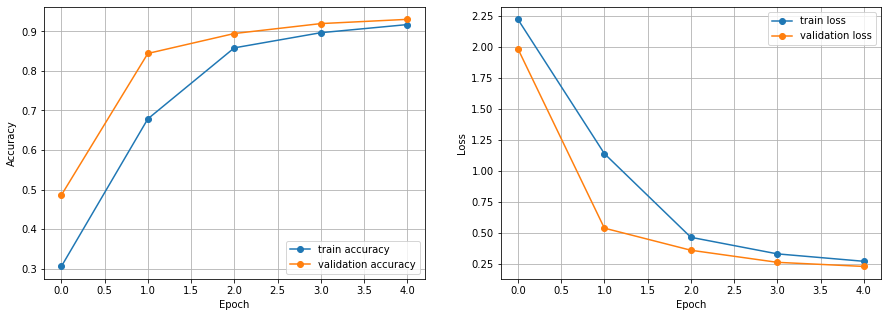

In [16]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(h2.history['accuracy'], 'o-', label='train accuracy')
plt.plot(h2.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(h2.history['loss'], 'o-', label='train loss')
plt.plot(h2.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()

In [17]:
test_loss_2, test_accuracy_2 = model_2.evaluate(x_test,y_test)
print(test_loss_2*100, test_accuracy_2*100)

313/313 [==============================] - 1s 3ms/step - loss: 0.2241 - accuracy: 0.9334
22.413909435272217 93.33999752998352


In [18]:
model_3 = keras.Sequential([
    keras.Input(shape=(28,28,1)),
    keras.layers.Conv2D(filters=32, kernel_size=(5,5), activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(3,3)),
    keras.layers.Conv2D(filters=16, kernel_size=(3,3), activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(5,5)),
    keras.layers.Flatten(),
    keras.layers.Dense(units=128, activation='relu'),
    keras.layers.Dense(units=64, activation='relu'),
    keras.layers.Dense(units=10, activation='softmax'),  
]
)
model_3.summary();

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 6, 6, 16)          4624      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 1, 1, 16)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 16)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               2176      
_________________________________________________________________
dense_7 (Dense)              (None, 64)               

In [19]:
model_3.compile(
    optimizer=keras.optimizers.RMSprop(), 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
    )

In [20]:
h3=model_3.fit(x=x_train, y=y_train, epochs=5, validation_split=0.16, batch_size=60 )

Epoch 1/5
840/840 [==============================] - 6s 6ms/step - loss: 0.6109 - accuracy: 0.8072 - val_loss: 0.2419 - val_accuracy: 0.9281
Epoch 2/5
840/840 [==============================] - 5s 6ms/step - loss: 0.2129 - accuracy: 0.9331 - val_loss: 0.1381 - val_accuracy: 0.9599
Epoch 3/5
840/840 [==============================] - 5s 6ms/step - loss: 0.1484 - accuracy: 0.9531 - val_loss: 0.1359 - val_accuracy: 0.9579
Epoch 4/5
840/840 [==============================] - 5s 6ms/step - loss: 0.1191 - accuracy: 0.9626 - val_loss: 0.1095 - val_accuracy: 0.9683
Epoch 5/5
840/840 [==============================] - 5s 6ms/step - loss: 0.1036 - accuracy: 0.9674 - val_loss: 0.0943 - val_accuracy: 0.9711


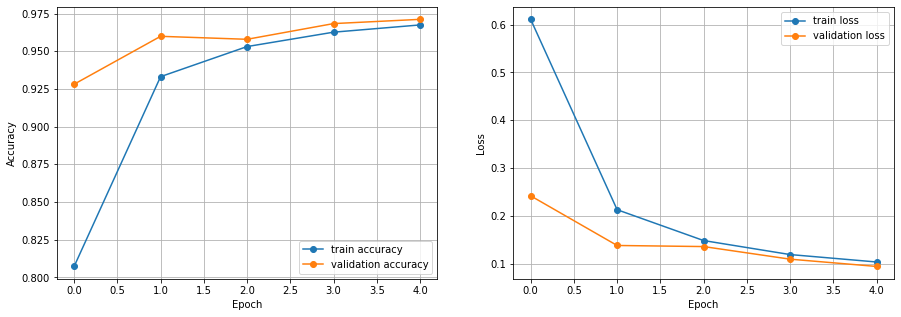

In [21]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(h3.history['accuracy'], 'o-', label='train accuracy')
plt.plot(h3.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(h3.history['loss'], 'o-', label='train loss')
plt.plot(h3.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()

In [22]:
test_loss_3, test_accuracy_3 = model_3.evaluate(x_test,y_test)
print(test_loss_3*100, test_accuracy_3*100)

313/313 [==============================] - 1s 3ms/step - loss: 0.0946 - accuracy: 0.9698
9.458832442760468 96.97999954223633
